In [15]:
pip install pydot

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p38/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [16]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
#tf.config.experimental.enable_op_determinism()

In [17]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [18]:
model = keras.Sequential(name='fashion')
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten(input_shape=(28, 28), name='flatten'))   ## Flatten
model.add(keras.layers.Dense(100, activation='relu', name='hidden'))    ## Activation Function
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

model.summary()

Model: "fashion"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 hidden (Dense)              (None, 100)               3137

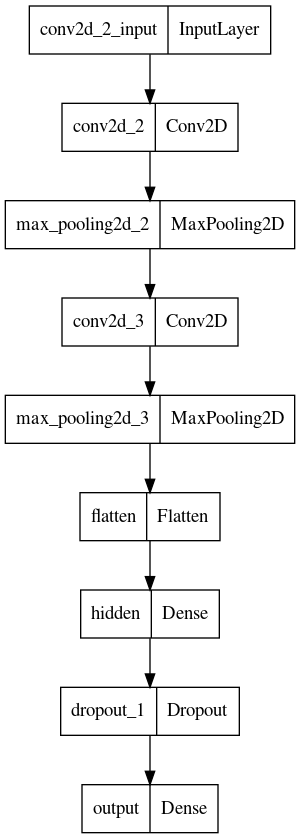

In [19]:
keras.utils.plot_model(model)

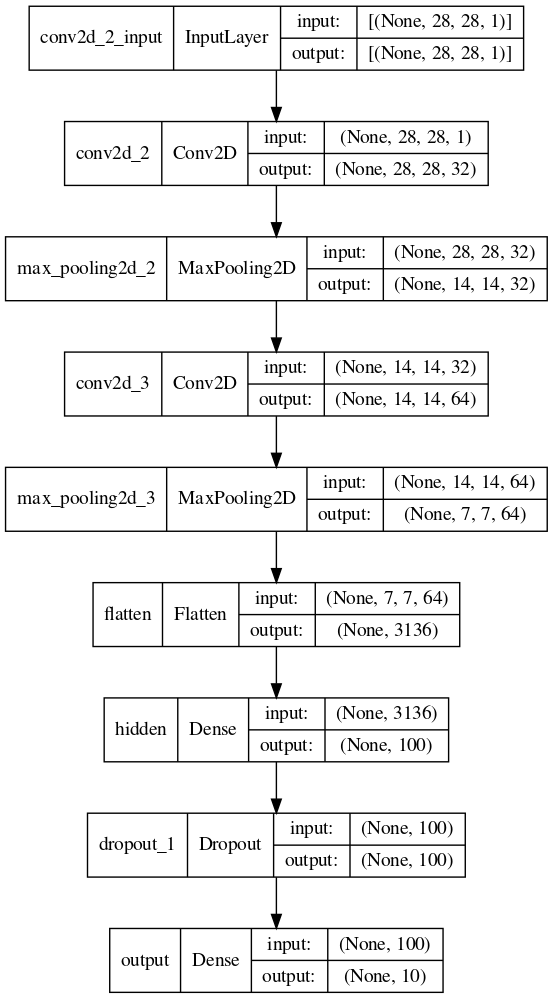

In [20]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=100)

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5395 - accuracy: 0.8076 - val_loss: 0.3509 - val_accuracy: 0.8689
Epoch 2/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3572 - accuracy: 0.8715 - val_loss: 0.2807 - val_accuracy: 0.8943
Epoch 3/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3034 - accuracy: 0.8910 - val_loss: 0.2668 - val_accuracy: 0.9003
Epoch 4/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2705 - accuracy: 0.9017 - val_loss: 0.2352 - val_accuracy: 0.9143
Epoch 5/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2400 - accuracy: 0.9113 - val_loss: 0.2425 - val_accuracy: 0.9143
Epoch 6/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2246 - accuracy: 0.9177 - val_loss: 0.2241 - val_accuracy: 0.9168
Epoch 7/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2084 - accuracy: 0.9235 - val_loss: 0.2141 - val_ac

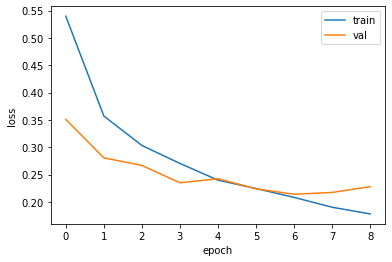

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [23]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2141 - accuracy: 0.9204


[0.21413874626159668, 0.9204166531562805]

In [24]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2360 - accuracy: 0.9161


[0.23603354394435883, 0.916100025177002]

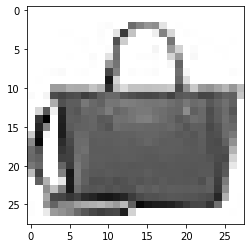

In [25]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

[[1.2600653e-14 3.6898947e-25 1.8665761e-18 1.2388060e-18 6.5418154e-17
  4.2485022e-17 2.3065522e-16 2.0270171e-16 1.0000000e+00 1.6583561e-19]]


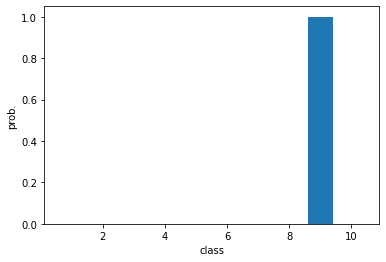

In [26]:
preds = model.predict(val_scaled[0:1])
print(preds)
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [27]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
import numpy as np
print(classes[np.argmax(preds)])

가방
